ETAPA DE PRÉ-PROCESSAMENTO DOS DADOS

Os dados utilizados foram retirados da base de dados abertos da Polícia Federal.

Os dados podem ser obtidos através do link: https://servicos.dpf.gov.br/dadosabertos/SINARM_CSV/OCORRENCIAS/

Importação de bibliotecas

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Carregando os dados

In [6]:
#Encontrar o tipo de formatação dos dados

with open("OCORRENCIAS_2024.csv", "rb") as f:
    result = chardet.detect(f.read(100000))  # Lê os primeiros 100.000 bytes
    print(result["encoding"])

ISO-8859-1


In [15]:
#Transformar o padrão de codificação dos caracteres

with open("OCORRENCIAS_2024.csv", "r", encoding="ISO-8859-1") as f:
    conteudo = f.read()

with open("OCORRENCIAS_2024_utf8.csv", "w", encoding="utf-8") as f:
    f.write(conteudo)


In [26]:
#Carregamento dos dados
df = pd.read_csv("OCORRENCIAS_2024_utf8.csv", encoding="utf-8", sep=";") #Separador dos dados ";"

PRIMEIRAS INFORMAÇÕES SOBRE A BASE DE DADOS

In [27]:
display(df)

,ANO_OCORRENCIA,MES_OCORRENCIA,UF,MUNICIPIO,ESPECIE_ARMA,MARCA_ARMA,CALIBRE_ARMA,TIPO_OCORRENCIA,MAIS_1000_MIL_HAB,TOTAL
0,2024,1,AC,ACRELÂNDIA,Espingarda ...,ROSSI (AMADEO ROSSI S.A.) ...,28 ...,Furto de Arma de Fogo ...,N,1
1,2024,1,AC,ACRELÂNDIA,Pistola ...,TAURUS ARMAS S.A. ...,9x19mm ...,Furto de Arma de Fogo ...,N,1
2,2024,1,AC,RIO BRANCO,Pistola ...,TAURUS ARMAS S.A. ...,.380 ACP ...,Furto de Arma de Fogo ...,S,1
3,2024,1,AC,RIO BRANCO,Pistola ...,TAURUS ARMAS S.A. ...,.45 ACP ...,Apostilada no Exercito ...,S,1
4,2024,1,AC,RIO BRANCO,Pistola ...,TAURUS ARMAS S.A. ...,9 mm ...,Recuperação de Arma de Fogo ...,S,1
...,...,...,...,...,...,...,...,...,...,...
9194,2024,12,TO,ARAGUAÍNA,Pistola ...,TAURUS ARMAS S.A. ...,.40 S&W ...,Extravio/Perda de Arma de Fogo ...,S,1
9195,2024,12,TO,GURUPI,Rifle ...,CBC (COMPANHIA BRASILEIRA DE CARTUCHOS) ...,.22 LR ...,Extravio/Perda de Arma de Fogo ...,N,2
9196,2024,12,,,Carabina ...,ROSSI (AMADEO ROSSI S.A.) ...,.357 Mag ...,Campanha do Desarmamento ...,N,1
9197,2024,12,,,Espingarda ...,BOITO (E.R. AMANTINO & CIA) ...,12 ...,Furto de Arma de Fogo ...,N,1


In [28]:
#Explorar os dados

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9199 entries, 0 to 9198
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO_OCORRENCIA     9199 non-null   int64 
 1   MES_OCORRENCIA     9199 non-null   int64 
 2   UF                 9199 non-null   object
 3   MUNICIPIO          9199 non-null   object
 4   ESPECIE_ARMA       9199 non-null   object
 5   MARCA_ARMA         9199 non-null   object
 6   CALIBRE_ARMA       9199 non-null   object
 7   TIPO_OCORRENCIA    9199 non-null   object
 8   MAIS_1000_MIL_HAB  9199 non-null   object
 9   TOTAL              9199 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 718.8+ KB
None


Obs: Não existe dados nulos na base de dados

In [29]:
print(df.describe())

       ANO_OCORRENCIA  MES_OCORRENCIA        TOTAL
count          9199.0     9199.000000  9199.000000
mean           2024.0        6.324601     1.135667
std               0.0        3.191856     0.566389
min            2024.0        1.000000     1.000000
25%            2024.0        4.000000     1.000000
50%            2024.0        6.000000     1.000000
75%            2024.0        9.000000     1.000000
max            2024.0       12.000000    20.000000


Verificar se possuem outlier nos dados.

Pode ser que foi inserido algum dado errado na base

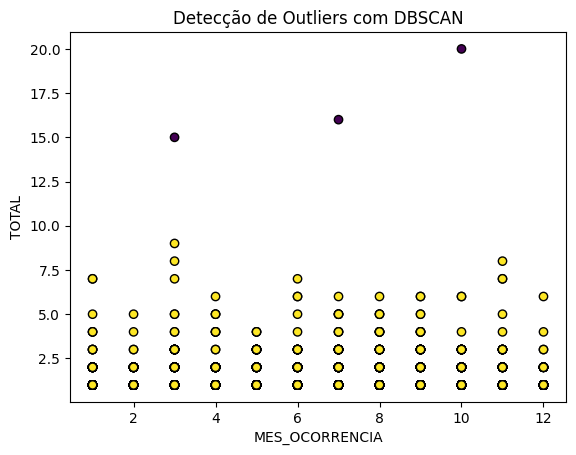

,ANO_OCORRENCIA,MES_OCORRENCIA,UF,MUNICIPIO,ESPECIE_ARMA,MARCA_ARMA,CALIBRE_ARMA,TIPO_OCORRENCIA,MAIS_1000_MIL_HAB,TOTAL,outlier
1436,2024,3,DF,BRASÍLIA,Revolver ...,TAURUS ARMAS S.A. ...,.38 ...,Remetida ao Exército para destruição ...,S,15,True
4787,2024,7,DF,BRASÍLIA,Pistola ...,TAURUS ARMAS S.A. ...,.380 ...,Extravio/Perda de Arma de Fogo ...,S,16,True
8099,2024,10,SP,RIBEIRÃO PRETO,Revolver ...,TAURUS ARMAS S.A. ...,.38 ...,Remetida ao Exército para destruição ...,S,20,True


In [38]:
#Cluster utilizando DBSCAN

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
data = df[numerical_cols].dropna()
scaled_data = StandardScaler().fit_transform(data)
# 3. Aplicar DBSCAN
dbscan = DBSCAN(eps=3.5, min_samples=5)  # Ajuste os parâmetros conforme necessário
labels = dbscan.fit_predict(scaled_data)

# 4. Identificar outliers (pontos com rótulo -1)
df["outlier"] = (labels == -1)

# 5. Visualizar os outliers
plt.scatter(data.iloc[:, 1], data.iloc[:, 2], c=labels, cmap="viridis", edgecolors='k')
plt.title("Detecção de Outliers com DBSCAN")
plt.xlabel(numerical_cols[1])
plt.ylabel(numerical_cols[2])
plt.show()

# 6. Exibir os outliers detectados
outliers = df[df["outlier"]]
display(outliers)

Pelo método DBSCAN encontrou-se 3 outlier